# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html for the instructions on how to install it. The easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6 or above.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments need to be written in Python 3.6 or above and can be run using Jupyter on Chrome, Safari or Firefox. These are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment4 using this file format:</u> <b>Yourfirstname_lastname_Assignment4.ipynb</b> 

#### <b>Deadline</b>: <u>Tuesday, Nov-19-2019 11:59 PM.</u>


# Assignment 4

In [26]:
##### Always import all needed libraries in the first cell
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from Dataset import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

# Planar data classification

In this assignment you will learn how to:
- Build a Multi layer perceptron neural network.
- Implement the forward propagation.
- Implement backpropagation 
- Testing skills to debug your neural network.



Hint: Always use vectorized version. It will save your time and the code will run more faster.


## Loading dataset

First,load the dataset on which you will be working on. The following line will load a "flower"dataset with 2-class dataset into variables features and label.

In [9]:
features, label = load_planar_dataset()

Try to visualize the data from the dataset using your favourite visualization library. The data looks like a "flower" with some red and blue points. The goal of this assignment is to build a model that will tell the class of the data(red or blue flower). 

### Question 1 --5 points

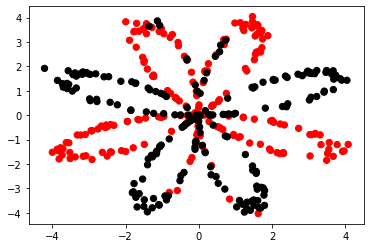

In [17]:
# Visualize the data:
plt.scatter(features[0, :], features[1, :], c=label[0], s=40, cmap=plt.cm.flag);

Before diving deep,Lets try to get a better sense of what our data is. 

### Question 2-- 5 points

How many training examples do you have? In addition, what is the shape of the variables feature and label ? 


In [20]:

shape_X = features.shape
shape_Y = label.shape
m = len(features[0])

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have %d training sample!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have 400 training sample!


## Question 3 -- 5 points

As it is a binary classification, it is good way to give it a try with logictic regression. 
Use sklearn's built-in Logistic regression (with no polynomials) and report the accuracy score.
Hint: Accuracy will be around 50%, do cross validation for testing ...

In [65]:
# Train the logistic regression classifier
X_train, X_test, y_train, y_test = train_test_split( features.T, label.T, test_size=0.2, random_state=39)
clf = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))
prediction=clf.predict(X_test)
acc = metrics.accuracy_score(prediction,y_test)
print("Accuracy: " + str(acc))

Accuracy: 0.5375


## Question 4 -- 5 points
Plot the decision boundary of these model below and also print the accuracy.

Accuracy: 0.5375


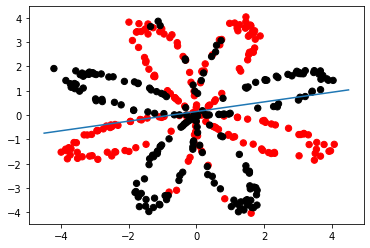

In [66]:
# Write code below for plotting the decision boundary for logistic regression 
slope = clf.coef_[0]
intercept = clf.intercept_[0]
x = np.linspace(-4.5, 4.5)
y = -slope[0] / slope[1] * x - intercept / slope[1]
plt.plot(x, y)
plt.scatter(features[0, :], features[1, :], c=label[0], s=40, cmap=plt.cm.flag);
# Write code below for printng the accuracy
acc = metrics.accuracy_score(prediction,y_test)
print("Accuracy: " + str(acc))

## Question 5 -- 5 points

Do you know the reason of poor performance of logistic regression?
Can you explain it briefly?

## The logistic regression without polynomial performs poorly because the data is not linearly separable but the decision boundary is restricted to be linear. In addition, the data is well-mixed and there are outliers, meaning this is a difficult classification problem. As a result the classifier is only slightly better than 50%, which is quite terrible given only two classes to predict. 

## - Neural Network model

As you can see,logistic regression did not do well. We need to switch from traditional binary classification algorithms to multi layer perceptron (Hopefully it will help). 

Build a neural network with one hidden layer to see if it can perform better than the logistic regression. 

For your convenience,a diagram and the mathematical formulas of the network thay you will build are given below (the bias is not included in the diagram but it should be included in your code):


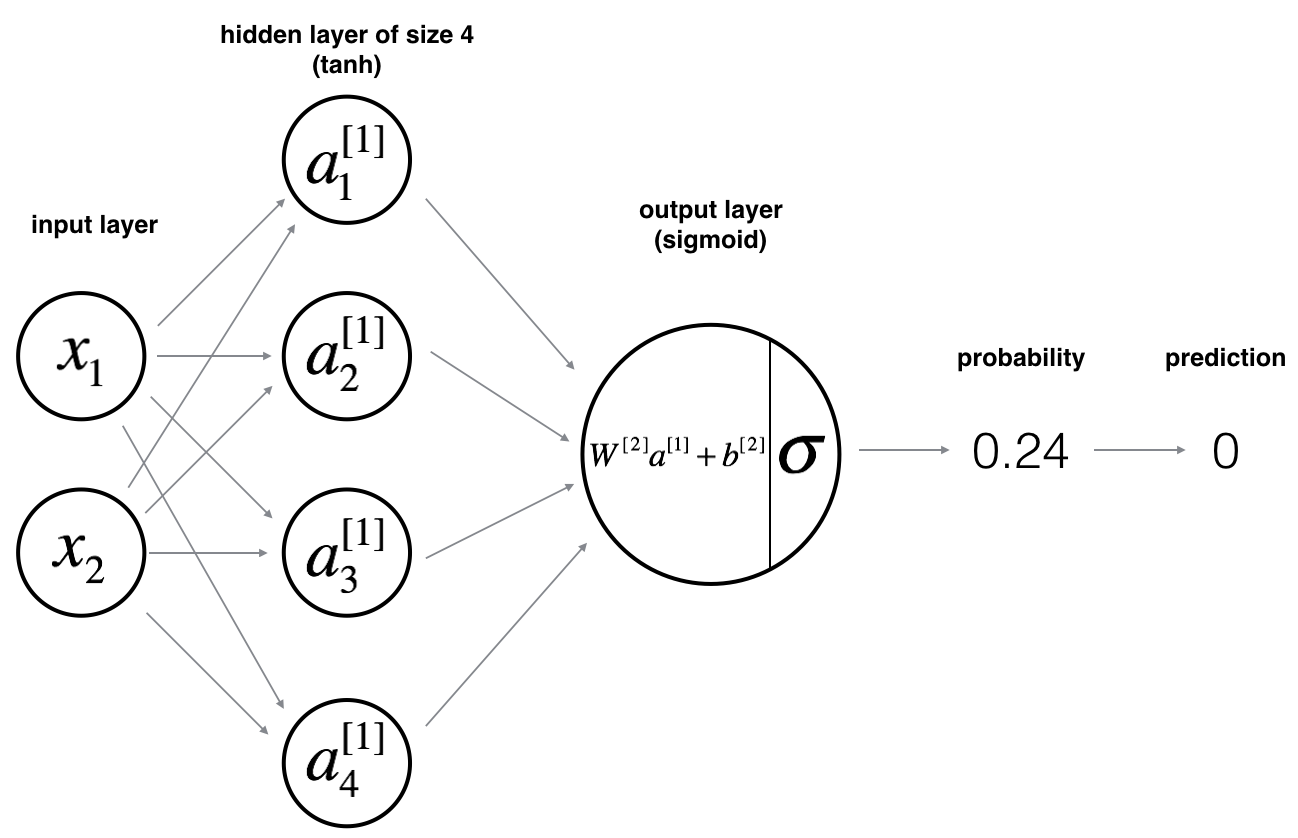

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost (cross-entropy cost in this case) $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$


To build a neural network, you need the following building blocks beforehand:

1. Layer defination
2. Initialization of parameters
3. Forward propagation
4. Cost computation
5. Backward propagation
6. Update of parameters after the run of gradient decent

This building blocks will be explained as we go along the the assignments.



## Question 5 -- 5 points
We are going to build a three layer MLP network. But you need to define the layer size. For defining the input and output layer size, you need to keep an eye on the size of your training data and number of classes you have respectively.The size of the hidden layer is something you can play with. Choose the size according to your wish.
Define three variables named input_layer_size( the size of the input layer),hidden_layer_size( the size of the hidden layer),output_layer_size(the size of the output layer).

Why did you pick a particular hidden layer size?


## Based on the input dataset, I noted that the flower shape is symmetric with eight 'petals'. Therefore I chose the hidden layer size to be 4, which should be exactly enough to deal with the complexity of the classification problem without overfitting. 

In [58]:
def layerSizes(X, Y):
    """
    X -- input dataset of shape 
    Y -- labels of shape
    """
    input_layer_size= X.shape[0]
    hidden_layer_size= 4
    output_layer_size= Y.shape[0]
    
    """
    Returns:
    input_layer_size -- the size of the input layer
    hidden_layer_size -- the size of the hidden layer
    output_layer_size -- the size of the output layer
    """
    
    return (input_layer_size, hidden_layer_size, output_layer_size)

In [59]:
# just run this code to test layerSizes function 
input_layer_size, hidden_layer_size, output_layer_size=layerSizes(features,label)
print("The size of the input layer is: = " + str(input_layer_size))
print("The size of the hidden layer is: = " + str(hidden_layer_size))
print("The size of the output layer is: = " + str(output_layer_size))

The size of the input layer is: = 2
The size of the hidden layer is: = 4
The size of the output layer is: = 1



## Question 6 -- 5 points
You need to initialize neural network with random values. Implement the initialize_parameters function.

Hint:Initialize the weights matrices with random values and also initialize the bias vectors as zeros.

In [63]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    input_size-- size of the input layer
    hidden_size -- size of the hidden layer
    output_size-- size of the output layer
    
    
    """
    
    np.random.seed(2)  # you can pick any seed in this case
    
    Weight1 = np.random.randn(hidden_size, input_size) / 100
    Weight2 = np.random.randn(output_size, hidden_size) / 100
    bias1 = np.zeros((hidden_size, 1))
    bias2 = np.zeros((output_size, 1))
    
    parameters = {"Weight1":Weight1,
                 "Weight2":Weight2,
                 "bias1":bias1,
                 "bias2":bias2,}
    
    
    """
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape 
                    b1 -- bias vector of shape 
                    W2 -- weight matrix of shape 
                    b2 -- bias vector of shape
    
    """
    
    return parameters

In [64]:
parameters = initialize_parameters(input_layer_size,hidden_layer_size,output_layer_size)
print("Weight1 = " + str(parameters["Weight1"]))
print("Weight2 = " + str(parameters["Weight2"]))
print("bias1 = " + str(parameters["bias1"]))
print("bias2 = " + str(parameters["bias2"]))

Weight1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
Weight2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
bias1 = [[0.]
 [0.]
 [0.]
 [0.]]
bias2 = [[0.]]


## Question 7 -- 15 points

 In this part forward propagation will be implemented. It will propagate the gradient in the forward pass from one layer to another.

At first,look at the mathematical representation of the classifier.For this assignment we are asking you to use tanh for the hidden layer and sigmoid for the output layer. (For neural network in general you can use any non-linear activation function, you might try at some point to change those and see if you can achieve better accuracy)

Then, do the following:

Retrieve each parameter from the dictionary "parameters" (which is the output of initialize_parameters function) by using parameters dictionary.

Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).


In [75]:
def forward_prop(X, parameters):
    """
    X -- input data of size
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    
    """
    # Retrieve each parameter from the dictionary "parameters"
    Weight1 = parameters["Weight1"]
    bias1 = parameters["bias1"]
    Weight2 = parameters["Weight2"]
    bias2 = parameters["bias2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(Weight1, X) + bias1
    A1 = np.tanh(Z1)
    Z2 = np.dot(Weight2, A1) + bias2
    A2 = sigmoid(Z2)
    
    #Values needed in the backpropagation are stored in cache. Later, it will be given to back propagation.
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    
    """
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    return A2, cache

In [76]:
#test function

np.random.seed(1) 
X_assess = np.random.randn(2, 3)

parameters = {'Weight1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'Weight2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'bias1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'bias2': np.array([[ 0.]])}


A2, cache = forward_prop(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

#the output of this print should be like below:

#-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431


To compute the cost, you need $A^{[2]}$. You have computed  $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

## Question 8 -- 15 points 
 
 Implement compute_cost() to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. Following is one of the way. Feel free to choose your conveneient way.

$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:


 

In [93]:

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation
    Y -- "true" labels vector of shape 
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    """
    
    m = Y.shape[1]  # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(Y,np.log(A2)) + np.multiply((1-Y),np.log(1-A2))
    cost = (-1/m) * np.sum(logprobs)
    ### Remember that, if you want to use different cross-entropy loss, you need to change logprobs and cost accordingly
    
    cost = float(np.squeeze(cost))   
    
    return cost

In [94]:
#test function
np.random.seed(1) 
Y_assess = np.random.randn(1, 3)
parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))



print("cost = " + str(compute_cost(A2, Y_assess, parameters)))
#the cost will be around 0.69

cost = 0.6929198874122721


## Question 9 -- 15 points 
Back propagation is an important part of a network. This will implement ONE back propagation iteration. 
Now, Implement the backward_propagation function. 
 Mathematical formula's are given below for your convenience.


Note: This representation is different than what you have in the course slides. Notice that layer numbering starts from 0.
This version is more convenient for coding. Remember that you need to find the derivative of any weight with respect to the cost function. Then, multiply it with the activation function in order to update using the GD algorithm. For the bias, there is no associated activation and this is why we have this sort of formulas. 

 
 
 
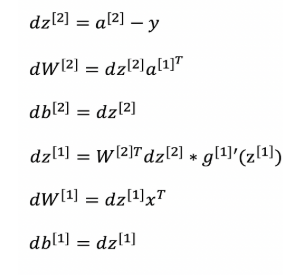

- Hint:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. remember you have two dfferent activation function.
    - derivative of tanh(x) = 1 - $tanh(x)^2$

In [117]:

def backward_propagation(parameters, cache, X, Y):
    """
    
    parameters -- dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data 
    Y -- "true" labels vector 
    
    
    """
    m = X.shape[1]
    
    # Copy W1 and W2 from the dictionary "parameters"
    Weight1 = parameters["Weight1"]
    Weight2 = parameters["Weight2"]
    
        
    # Copy A1 and A2 from dictionary "cache".
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    #  calculate dW1, db1, dW2, db2. 
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2,axis = 1,keepdims = True)
    dZ1 = np.dot(Weight2.T,dZ2) * (1 - np.power(A1,2) )
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) * np.sum(dZ1,axis = 1,keepdims = True)
    
    gradient = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return gradient

In [123]:
#test function
np.random.seed(1) 
X_assess = np.random.randn(2, 3)
Y_assess = np.random.randn(1, 3)
parameters = {'Weight1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'Weight2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'bias1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'bias2': np.array([[ 0.]])}

cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
         [-0.05225116,  0.02725659, -0.02646251],
         [-0.02009721,  0.0036869 ,  0.02883756],
         [ 0.02152675, -0.01385234,  0.02599885]]),
  'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
  'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
         [-0.05229879,  0.02726335, -0.02646869],
         [-0.02009991,  0.00368692,  0.02884556],
         [ 0.02153007, -0.01385322,  0.02600471]]),
  'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}

grads = backward_propagation(parameters, cache, X_assess, Y_assess) # call the back propagation here with appropriate parameters
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

#The output should be 


#db1 = [[-0.00069728]
 #[-0.00060606]
 #[ 0.000364  ]
# [ 0.00151207]]
#dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
#db2 = [[0.06589489]]

db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


## Question 10 -- 15 points 
This update rule will help back propagation to pass the update backward. 

Now,Implement the update rule using your known gradient descent. 

Hint:

You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).



In [132]:


def update_parameters(parameters, grads, learning_rate = 0.5):
    """
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    """
    # Copy the following parameter from the dictionary "parameters"
    Weight1 = parameters["Weight1"]
    bias1 = parameters["bias1"]
    Weight2 = parameters["Weight2"]
    bias2 = parameters["bias2"]
    
    # Copy each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    Weight1 = Weight1 - (dW1*learning_rate)
    Weight2 = Weight2 - (dW2*learning_rate)
    bias1 = bias1 - (db1*learning_rate)
    bias2 = bias2 - (db2*learning_rate)
    
    parameters = {"Weight1": Weight1,
                  "Weight2": Weight2,
                  "bias1": bias1,
                  "bias2": bias2}
    
    """
    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    #print(parameters)
    return parameters

In [133]:
#test function
np.random.seed(1) 
parameters = {'Weight1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
 'Weight2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
 'bias1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
 'bias2': np.array([[  9.14954378e-05]])}

grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
        [ 0.00082222, -0.00700776],
        [-0.00031831,  0.0028636 ],
        [-0.00092857,  0.00809933]]),
 'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
          -2.55715317e-03]]),
 'db1': np.array([[  1.05570087e-07],
        [ -3.81814487e-06],
        [ -1.90155145e-07],
        [  5.46467802e-07]]),
 'db2': np.array([[ -1.08923140e-05]])}
parameters = update_parameters(parameters, grads)

print("Weight1 = " + str(parameters["Weight1"]))
print("bias1 = " + str(parameters["bias1"]))
print("Weight2 = " + str(parameters["Weight2"]))
print("bias2 = " + str(parameters["bias2"]))

#Output should be 

#Weight1 = [[-0.006267    0.01792921] [-0.02352903  0.03487509] [-0.01676255 -0.01895725] [ 0.00981865 -0.05423187]]
#bias1 = [[-9.50308498e-07] [ 1.00646934e-05][ 6.99888206e-07] [-2.81884090e-06]]
#Weight2 = [[-0.01042311 -0.04204123  0.01670053  0.04568113]]
#bias2 = [[9.69415948e-05]]

Weight1 = [[-0.006267    0.01792921]
 [-0.02352903  0.03487509]
 [-0.01676255 -0.01895725]
 [ 0.00981865 -0.05423187]]
bias1 = [[-9.50308498e-07]
 [ 1.00646934e-05]
 [ 6.99888206e-07]
 [-2.81884090e-06]]
Weight2 = [[-0.01042311 -0.04204123  0.01670053  0.04568113]]
bias2 = [[9.69415948e-05]]


## Question 11 -- 15 points 

The building blocks that we have mentioned previously are done now. Now, its time to put all together.

In this part of the question, those component will be put together to build the model.

Implement the neural network model in the function named model.

Hint:Don't forget to use the previous functions in the right order.

In [191]:


def model(X, Y, n_h, num_iterations = 1000, print_cost=True, learning_rate = 0.5):
    """
    X -- dataset
    Y -- labels
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent
    print_cost -- if True, print the cost in every 100 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(42)
    n_x = layerSizes(X, Y)[0]
    n_y = layerSizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    Weight1 = parameters["Weight1"]
    bias1 = parameters["bias1"]
    Weight2 = parameters["Weight2"]
    bias2 = parameters["bias2"]
    
    # gradient descent

    for i in range(0, num_iterations):
         
        # Call the Forward propagation with X, and parameters.
        A2, cache = forward_prop(X, parameters)
        
        # Call the Cost function with A2, Y and parameters.
        cost = compute_cost(A2, Y, parameters)
 
        # Call Backpropagation with Inputs, parameters, cache, X and Y.
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Update gradient descent parameter with  parameters and grads and learning rate.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

## Question 12 -- 15 points

Now, you have the model in your hand.It is time to use it and see it in action. Use the model to predict  using the function named predict and also plot the decision boundar

Hint:Use forward propagation to predict results.


In [192]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    parameters -- python dictionary containing your parameters 
    X -- input data
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_prop(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

Now, run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

[[ True  True  True ...  True  True  True]]


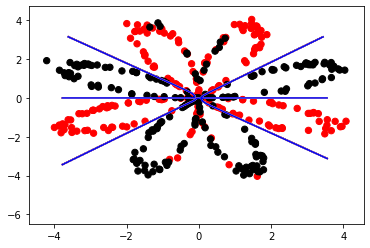

In [193]:
# Build a model with a n_h-dimensional hidden layer
parameters = model(features, label, n_h = 4, num_iterations = 10000, print_cost=False)

# Plot the decision boundary
#Source: https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
h = .01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = features[:, 0].min() - 5, features[:, 0].max() 
y_min, y_max = features[:, 1].min() - 5, features[:, 1].max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = predict(parameters, np.c_[xx.ravel(), yy.ravel()].T)
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.flag)
plt.scatter(features[0, :], features[1, :], c=label[0], s=40, cmap=plt.cm.flag);
plt.show()

In [194]:
# Print accuracy
predictions = predict(parameters, features)
print ('Accuracy: %d' % float((np.dot(label,predictions.T) + np.dot(1-label,1-predictions.T))/float(label.size)*100) + '%')

Accuracy: 90%


**Expected Output**: 

<table style="width:15%">
  <tr>
    <td>**Accuracy**</td>
    <td> 91% </td> 
  </tr>
</table>

As you can see,accuracy is really high compared to Logistic Regression. The model has learnt the pattern of the leaves which is awesome. This can give you a sense that neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression. 


# Grad Student part


## Question 13 -- 15 points

Try out several hidden layer(at least 4), to see if it improves the accuracy or not. 
Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

[[ True  True  True ...  True  True  True]]
Accuracy for 2 hidden units: 67.0 %
[[ True  True  True ... False False False]]
Accuracy for 3 hidden units: 90.75 %
[[ True  True  True ...  True  True  True]]
Accuracy for 4 hidden units: 90.5 %
[[ True  True  True ... False False False]]
Accuracy for 5 hidden units: 91.0 %
[[ True  True  True ...  True  True  True]]
Accuracy for 6 hidden units: 91.25 %
[[ True  True  True ...  True  True  True]]
Accuracy for 20 hidden units: 91.25 %
[[ True  True  True ...  True  True  True]]
Accuracy for 50 hidden units: 90.75 %
[[ True  True  True ...  True  True  True]]
Accuracy for 200 hidden units: 90.75 %


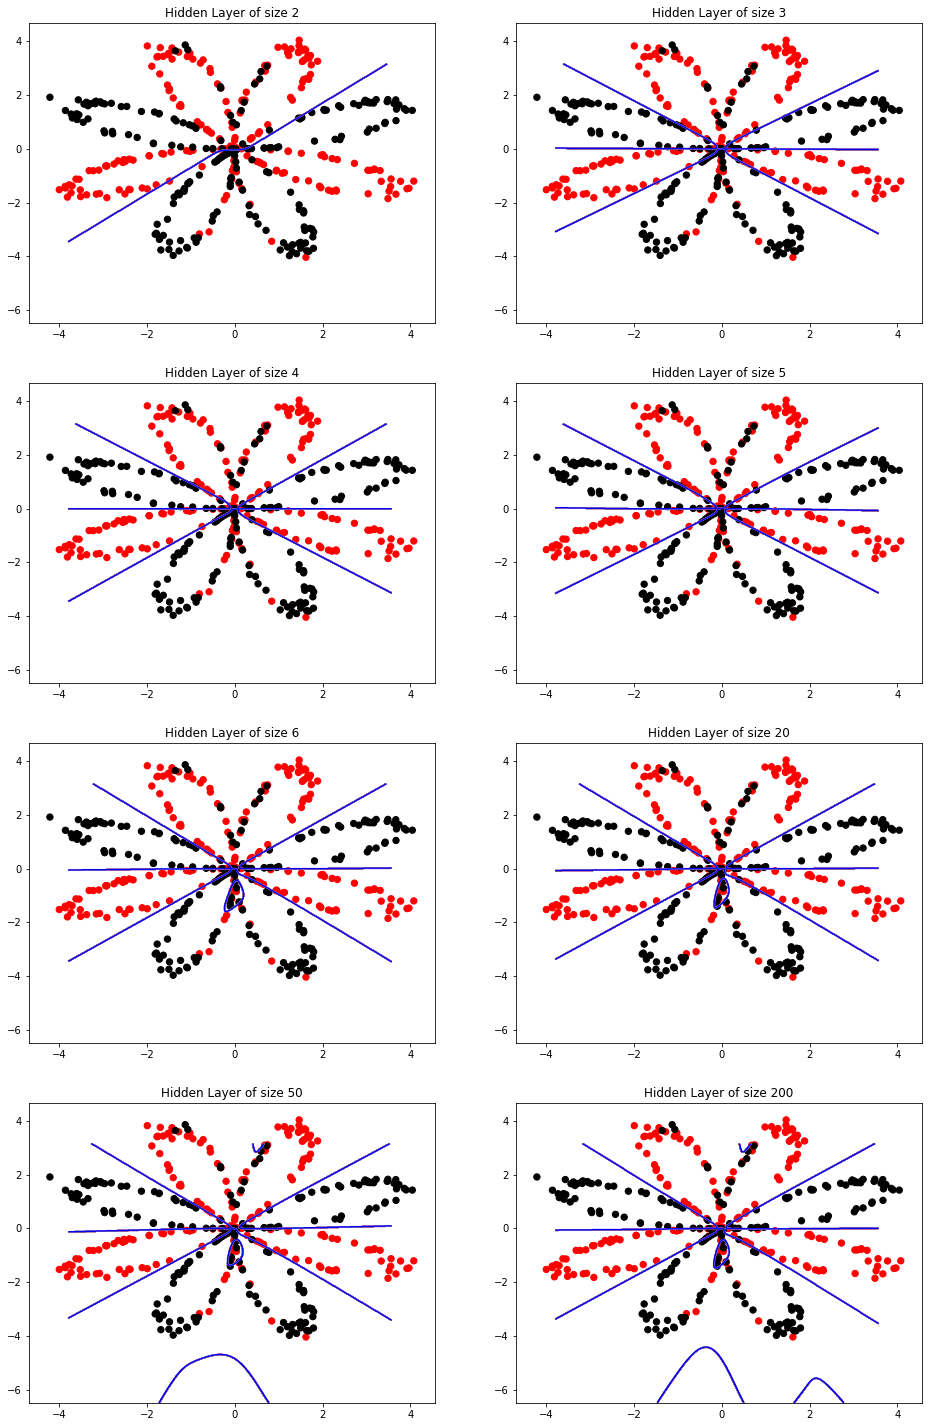

In [204]:
# This may take about 2 minutes to run
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [2,3,4,5,6,20,50,200]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = model(features, label, n_h = n_h, num_iterations = 10000, print_cost=False)

    h = .01  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = features[:, 0].min() - 5, features[:, 0].max() 
    y_min, y_max = features[:, 1].min() - 5, features[:, 1].max() + 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = predict(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    print(Z)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.flag)
    plt.scatter(features[0, :], features[1, :], c=label[0], s=40, cmap=plt.cm.flag);
    predictions = predict(parameters, features)
    accuracy = float((np.dot(label,predictions.T) + np.dot(1-label,1-predictions.T))/float(label.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

## Question 14 -- 5 points

Do you think that the model is overfitting ? What is the layer size for hidden layer? Why do you think so?

## It appears the model is overfitting for any more than five layers, which appears to be optimal. I made this judgement because the accuracy is not increasing at this point but model complexity is, in addition there appears to be noticeable overfitting for six hidden layers. To keep the model as robust as possible we wan't to avoid adding  hidden layers that are unnecessary given the complexity of the input dataset.

## Question 15 -- 5 points

Play with the learning_rate. What happens for different learning rate?

[[ True  True  True ... False False False]]
Accuracy for 0.005 learning rate: 55.25 %
[[ True  True  True ... False False False]]
Accuracy for 0.006 learning rate: 58.25 %
[[ True  True  True ... False False False]]
Accuracy for 0.007 learning rate: 63.5 %
[[ True  True  True ...  True  True  True]]
Accuracy for 0.008 learning rate: 79.0 %
[[ True  True  True ...  True  True  True]]
Accuracy for 0.009 learning rate: 84.75 %
[[ True  True  True ...  True  True  True]]
Accuracy for 0.01 learning rate: 85.75 %
[[ True  True  True ...  True  True  True]]
Accuracy for 0.02 learning rate: 87.75 %
[[ True  True  True ... False False False]]
Accuracy for 0.1 learning rate: 88.75 %
[[ True  True  True ...  True  True  True]]
Accuracy for 5 learning rate: 90.0 %
[[ True  True  True ...  True  True  True]]
Accuracy for 10 learning rate: 85.5 %


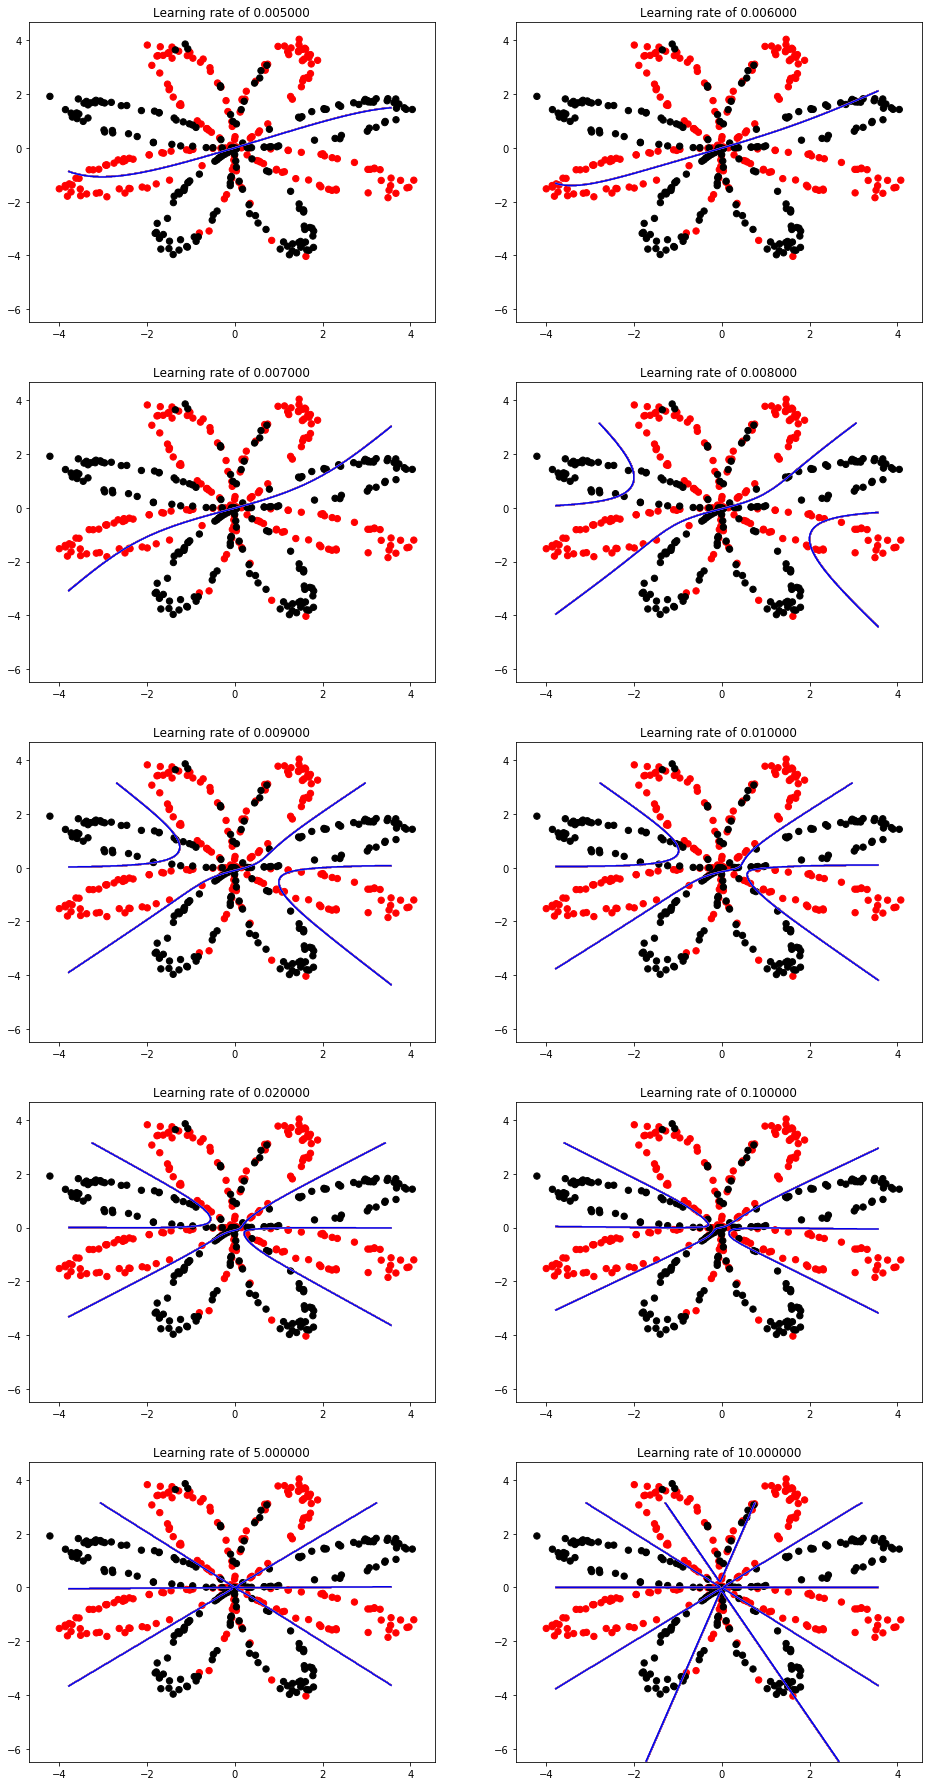

In [214]:
# This may take about 2 minutes to run
plt.figure(figsize=(16, 32))
learning_rates = [.005,.006,.007,.008,.009,.01,.02,.1,5,10]
for i, l_R in enumerate(learning_rates):
    plt.subplot(5, 2, i+1)
    plt.title('Learning rate of %f' % l_R)
    parameters = model(features, label, n_h = 5, num_iterations = 10000, print_cost=False, learning_rate = l_R)

    h = .01  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = features[:, 0].min() - 5, features[:, 0].max() 
    y_min, y_max = features[:, 1].min() - 5, features[:, 1].max() + 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = predict(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    print(Z)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.flag)
    plt.scatter(features[0, :], features[1, :], c=label[0], s=40, cmap=plt.cm.flag);
    predictions = predict(parameters, features)
    accuracy = float((np.dot(label,predictions.T) + np.dot(1-label,1-predictions.T))/float(label.size)*100)
    print ("Accuracy for {} learning rate: {} %".format(l_R, accuracy))

## For decreased learning rates, we see how the algorithm performs worse because we keep the number of iterations constant. As the learning rate increases from very low values, so does accuracy for our fixed number of iterations. This visualization gives insight into the intermediate decision boundaries that describe the training process of the network. It also shows how if the learning rate is too high, the network will fail to properly converge.

# Performance on other datasets

# Extra credit for all students:

# Question 16 -- 10 points

In this part, try to get the accuracy on noisy data above 60%.

If you want, you can rerun the whole notebook (minus the dataset part) for the following datasets.

You will get full marks for this only if you can take the accuracy above 60%. It might be time consuming. So, plan accordingly. Feel free to change the size of hidden layer or adding a new hidden layer. If you have any other idea feel free to talk(but have to be using Multi layer perceptron)

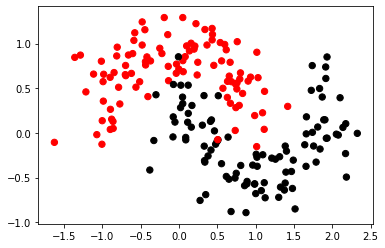

In [216]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}


dataset = "noisy_moons" #use this dataset only


X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])


# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.flag);

In [230]:
parameters = model(X, Y, n_h = 10, num_iterations = 10000, print_cost=False, learning_rate = .5)



In [233]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


Accuracy: 99%


[[ True  True  True ... False False False]]


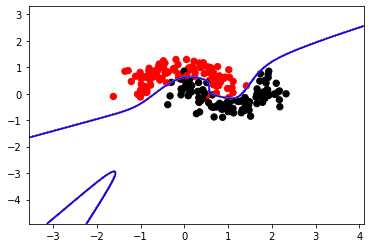

In [234]:
h = .01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = predict(parameters, np.c_[xx.ravel(), yy.ravel()].T)
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.flag)
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.flag);
plt.show()